# Sobel edge detection

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

[[ 90  90  90  90  90  90  90  90]
 [ 90  20  20  20 150 150 150  90]
 [ 90  20  20  20 150 150 150  90]
 [ 90  20  20  20 150 150 150  90]
 [ 90  20  20  20 150 150 150  90]
 [ 90  20  20  20 150 150 150  90]
 [ 90  20  20  20 150 150 150  90]
 [ 90  90  90  90  90  90  90  90]]

[[ -70.  -70.    0.  130.  130.    0.  -60.  -60.]
 [-210. -210.    0.  390.  390.    0. -180. -180.]
 [-280. -280.    0.  520.  520.    0. -240. -240.]
 [-280. -280.    0.  520.  520.    0. -240. -240.]
 [-280. -280.    0.  520.  520.    0. -240. -240.]
 [-280. -280.    0.  520.  520.    0. -240. -240.]
 [-210. -210.    0.  390.  390.    0. -180. -180.]
 [ -70.  -70.    0.  130.  130.    0.  -60.  -60.]]

[[ 66  66  89 130 130  89  70  70]
 [ 22  22  89 213 213  89  31  31]
 [  0   0  89 255 255  89  12  12]
 [  0   0  89 255 255  89  12  12]
 [  0   0  89 255 255  89  12  12]
 [  0   0  89 255 255  89  12  12]
 [ 22  22  89 213 213  89  31  31]
 [ 66  66  89 130 130  89  70  70]]


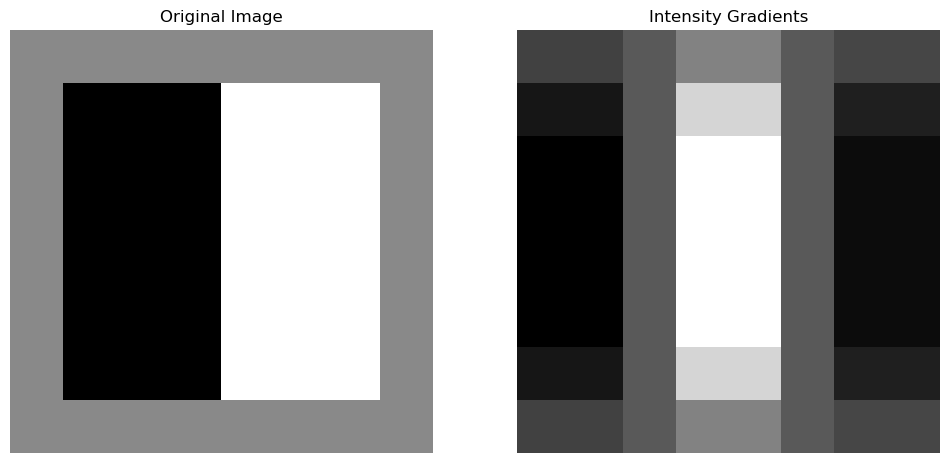

In [4]:
image_8x8 = np.ones((8, 8), dtype = np.uint8)*90
image_8x8[1:7,1:4] = 20
image_8x8[1:7,4:7] = 150
print(image_8x8)
kernel = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]]) 
sobelx_filter2d = cv2.filter2D(src=image_8x8, ddepth=cv2.CV_64F, kernel=kernel, borderType=cv2.BORDER_REPLICATE)
print('')
print(sobelx_filter2d)
print('')
sobelx_filter2d = sobelx_filter2d - sobelx_filter2d.min()
sobelx_filter2d = sobelx_filter2d/sobelx_filter2d.max()
sobelx_filter2d = (sobelx_filter2d * 255).astype('uint8')
print(sobelx_filter2d)

plt.figure(figsize = (12, 10))
plt.subplot(121); plt.axis('off'); plt.imshow(image_8x8);       plt.title('Original Image')
plt.subplot(122); plt.axis('off'); plt.imshow(sobelx_filter2d); plt.title('Intensity Gradients');

# To detect vertical and horizontal edges

(800, 800, 3)


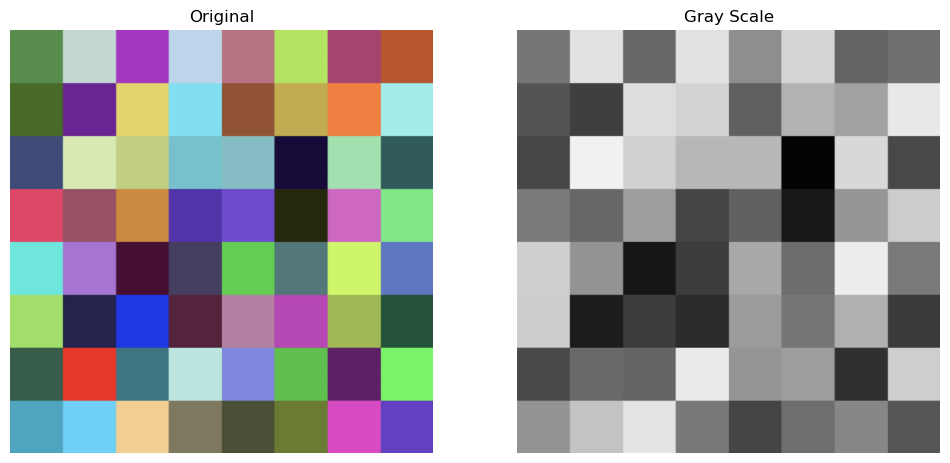

In [5]:
img = cv2.imread('checkerboard_color.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.figure(figsize = (12, 8))
plt.subplot(121); plt.axis('off'); plt.imshow(img[:,:,::-1]); plt.title('Original')
plt.subplot(122); plt.axis('off'); plt.imshow(img_gray);      plt.title('Gray Scale');

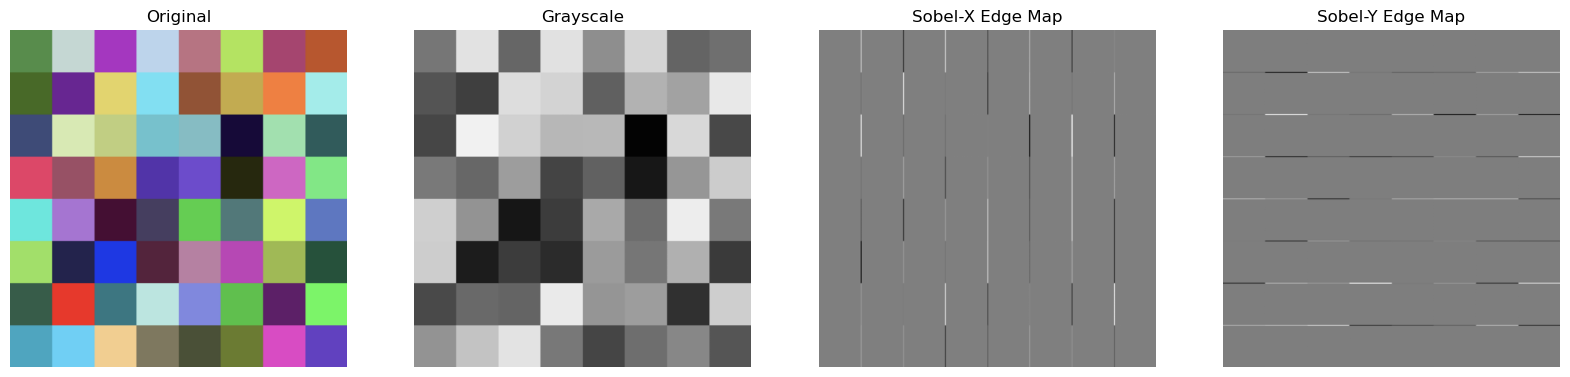

In [7]:
sobelx  = cv2.Sobel(src = img_gray, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize = 3) 
sobely  = cv2.Sobel(src = img_gray, ddepth = cv2.CV_64F, dx = 0, dy = 1, ksize = 3)

plt.figure(figsize = (20,12))
plt.subplot(141); plt.axis('off'); plt.imshow(img[:,:,::-1]); plt.title('Original')
plt.subplot(142); plt.axis('off'); plt.imshow(img_gray);      plt.title('Grayscale') 
plt.subplot(143); plt.axis('off'); plt.imshow(sobelx);        plt.title('Sobel-X Edge Map')
plt.subplot(144); plt.axis('off'); plt.imshow(sobely);        plt.title('Sobel-Y Edge Map');